In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from train import * 
from train_optimal import *

import warnings
warnings.filterwarnings('ignore')

In [151]:
import os 

In [152]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

data_folder_path = os.path.join(root_dir, 'data')

file_path = os.path.join(data_folder_path, 'robotarm.csv')

df = pd.read_csv(file_path)

## Baseline results

In [153]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.84',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.84',
  'Standard Deviation of Accuracy': '0.02'}]

In [80]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.69',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.74',
  'Standard Deviation of Accuracy': '0.02'}]

In [81]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.67',
  'Standard Deviation of AUC': '0.04',
  'Mean Accuracy': '0.76',
  'Standard Deviation of Accuracy': '0.02'}]

In [82]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.59',
  'Standard Deviation of AUC': '0.03',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.02'}]

In [83]:

args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results2 = cross_validate(**args)
results2

[{'Mean AUC': '0.77',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.80',
  'Standard Deviation of Accuracy': '0.03'}]

In [84]:

args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results2 = cross_validate(**args)
results2

[{'Mean AUC': '0.63',
  'Standard Deviation of AUC': '0.04',
  'Mean Accuracy': '0.70',
  'Standard Deviation of Accuracy': '0.01'}]

In [85]:
args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results3 = cross_validate(**args)
results3

[{'Mean AUC': '0.83',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.83',
  'Standard Deviation of Accuracy': '0.03'}]

In [86]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results4 = cross_validate(**args)
results4

[{'Mean AUC': '0.87',
  'Standard Deviation of AUC': '0.03',
  'Mean Accuracy': '0.85',
  'Standard Deviation of Accuracy': '0.03'}]

### Sequence truncation

In [87]:
method_params = [3, 4, 5, 6, 7, 8, 9, 10]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 3
[{'Mean AUC': '0.68', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.71', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 6
[{'Mean AUC': '0.77', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 7
[{'Mean AUC': '0.78', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.77', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 8
[{'Mean AUC': '0.80', 'Standard Deviation of AUC': '0.00', 'Mean Accuracy': '0.77', 'Standard Deviation of Ac

In [89]:
method_params = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.57', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.82', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 5
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 7
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.82', 'Standard Deviation of Ac

In [90]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.57', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.82', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 6
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.83', 'Standard Deviation of Ac

In [91]:
method_params = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.64', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.69', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 3
[{'Mean AUC': '0.67', 'Standard Deviation of AUC': '0.08', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 4
[{'Mean AUC': '0.70', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.71', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.78', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 7
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.78', 'Standard Deviation of Ac

In [92]:
method_params = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 5
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 6
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 7
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Ac

In [93]:
method_params = [2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.64', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 3
[{'Mean AUC': '0.71', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.72', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 5
[{'Mean AUC': '0.77', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.77', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 6
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 7
[{'Mean AUC': '0.80', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.80', 'Standard Deviation of Ac

In [94]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

baseline_results = cross_validate(**args)
print("Baseline results")
print(baseline_results)


method_params = [2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

Baseline results
[{'Mean AUC': '0.86', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.02'}]
With method mode last and method param 2
[{'Mean AUC': '0.61', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.86', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.86', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 5
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.86', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.03'}]


With m

In [96]:
method_params = [2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.63', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 3
[{'Mean AUC': '0.70', 'Standard Deviation of AUC': '0.08', 'Mean Accuracy': '0.73', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 4
[{'Mean AUC': '0.74', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 5
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 6
[{'Mean AUC': '0.82', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.81', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 7
[{'Mean AUC': '0.82', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.81', 'Standard Deviation of Ac

In [98]:
method_params = [2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 2
[{'Mean AUC': '0.62', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.87', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.87', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.87', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.87', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 7
[{'Mean AUC': '0.87', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.86', 'Standard Deviation of Ac

In [101]:
# Function to compare results and find the closest match
def find_closest_match(baseline_results, method_results, metric="Mean AUC"):
    baseline_metric = float(baseline_results[0][metric])
    closest_n = None
    closest_diff = float('inf')
    optimal_diff = float(baseline_results[0]["Standard Deviation of AUC"])
    
    for n, results in method_results.items():
        method_metric = float(results[0][metric])
        diff = abs(baseline_metric - method_metric)
        if diff < optimal_diff:
            closest_n = n
            return closest_n, closest_diff
        else:
            if diff < closest_diff:
                closest_n = n
                closest_diff = diff
    
    return closest_n, closest_diff
            

# Calculate baseline results
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "world_code_error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}
baseline_results = cross_validate(**args)
print("Baseline Results:", baseline_results)

# Store method results
method_params = [2, 3, 4, 5, 6, 7, 8]
method_results = {}

for n in method_params:
    args = {
        "model_type": "rf",
        "split_type": "median",
        "task": "world_code_error",
        "one_hot": False,
        "k": 5,
        "sequence_method": "truncate_subsequences",
        "method_param": n, 
        "method_mode": "last",
        "data": df
    }

    results = cross_validate_optimized(**args)
    method_results[n] = results
    #print(f"With method mode last and method param {n}")
    #print(results)
    #print("\n")

# Find the closest match
closest_n, closest_diff = find_closest_match(baseline_results, method_results)
print(f"The parameter n that gives results closest to the baseline is {closest_n} with a difference of {closest_diff:.2f}")

Baseline Results: [{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.03'}]
The parameter n that gives results closest to the baseline is 3 with a difference of 0.24


In [105]:
def compare_results(args, method_mode):
    
    baseline_results = cross_validate(**args)
    print("Baseline Results:", baseline_results)

    # Store method results
    method_params = [2, 3, 4, 5, 6, 7, 8]
    method_results = {} 
    
    args_trunc = args.copy()
    args_trunc["sequence_method"] = "truncate_subsequences"
    args_trunc["method_mode"] = method_mode
    args_trunc = {k: v for k, v in args_trunc.items() if k != "prediction"}
    
    for n in method_params:
        results = cross_validate_optimized(**args_trunc, method_param=n)
        method_results[n] = results
        
    # Find the closest match
    closest_n, closest_diff = find_closest_match(baseline_results, method_results)
    print(f"The parameter n that gives results closest to the baseline is {closest_n} with a difference of {closest_diff:.2f}")
    
    args_to_save = {k: v for k, v in args.items() if k != "data"}
    
    results = {"args": args_to_save, "baseline_AUC": baseline_results[0]["Mean AUC"], "closest_n": closest_n, "closest_diff": closest_diff}
    
    return results

In [106]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "world_code_error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 3 with a difference of 0.24


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'world_code_error',
  'prediction': 'success',
  'one_hot': False,
  'k': 5},
 'baseline_AUC': '0.85',
 'closest_n': 3,
 'closest_diff': 0.24}

In [107]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "world_code_case",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.87', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.03'}]
The parameter n that gives results closest to the baseline is 3 with a difference of 0.25


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'world_code_case',
  'prediction': 'success',
  'one_hot': False,
  'k': 5},
 'baseline_AUC': '0.87',
 'closest_n': 3,
 'closest_diff': 0.25}

In [108]:
args = {
    "model_type": "rf",
    "split_type": "distribution",
    "task": "world_code_error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.81', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 3 with a difference of 0.26


{'args': {'model_type': 'rf',
  'split_type': 'distribution',
  'task': 'world_code_error',
  'prediction': 'success',
  'one_hot': False,
  'k': 5},
 'baseline_AUC': '0.83',
 'closest_n': 3,
 'closest_diff': 0.26}

In [109]:
args = {
    "model_type": "rf",
    "split_type": "distribution",
    "task": "world_code_case",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.01'}]
The parameter n that gives results closest to the baseline is 3 with a difference of 0.27


{'args': {'model_type': 'rf',
  'split_type': 'distribution',
  'task': 'world_code_case',
  'prediction': 'success',
  'one_hot': False,
  'k': 5},
 'baseline_AUC': '0.83',
 'closest_n': 3,
 'closest_diff': 0.2699999999999999}

### Sequence truncation - Version 2

In [110]:
args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.83',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.81',
  'Standard Deviation of Accuracy': '0.01'}]

In [111]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.81', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.77', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.79', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 3
[{'Mean AUC': '0.73', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.69', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.76', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 5
[{'Mean AUC': '0.63', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 6
[{'Mean AUC': '0.62', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.74', 'Standard Deviation of Ac

In [112]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_error",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.60', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.69', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.57', 'Standard Deviation of AUC': '0.07', 'Mean Accuracy': '0.66', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 3
[{'Mean AUC': '0.50', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.52', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.66', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 5
[{'Mean AUC': '0.54', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.68', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 6
[{'Mean AUC': '0.49', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.67', 'Standard Deviation of Ac

In [113]:
args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.83',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.82',
  'Standard Deviation of Accuracy': '0.02'}]

In [114]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 2
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 3
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 4
[{'Mean AUC': '0.70', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.76', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.65', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 6
[{'Mean AUC': '0.63', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.74', 'Standard Deviation of Ac

In [120]:
args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1 = cross_validate(**args)
results1

[{'Mean AUC': '0.84',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.82',
  'Standard Deviation of Accuracy': '0.03'}]

In [122]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mean_aucs_last = []
std_aucs_last = []

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    mean_aucs_last.append(results[0]["Mean AUC"])
    std_aucs_last.append(results[0]["Standard Deviation of AUC"])
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.61', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.68', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.57', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.68', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.51', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.53', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.66', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.54', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.69', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 6
[{'Mean AUC': '0.54', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.69', 'Standard Deviation of Ac

In [123]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mean_aucs_first = []
std_aucs_first = []

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    mean_aucs_first.append(results[0]["Mean AUC"])
    std_aucs_first.append(results[0]["Standard Deviation of AUC"])
    print("With method mode first and method param", n)
    print(results)
    print("\n")

With method mode first and method param 1
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.01'}]


With method mode first and method param 2
[{'Mean AUC': '0.80', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.04'}]


With method mode first and method param 3
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.03'}]


With method mode first and method param 4
[{'Mean AUC': '0.70', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.77', 'Standard Deviation of Accuracy': '0.02'}]


With method mode first and method param 5
[{'Mean AUC': '0.65', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.03'}]


With method mode first and method param 6
[{'Mean AUC': '0.63', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.73', 'Standard Deviation

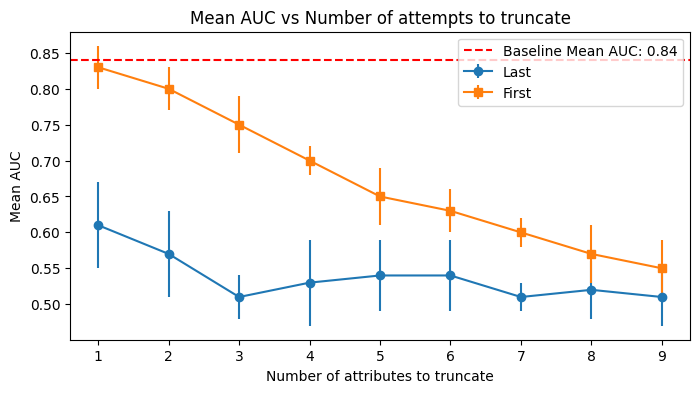

In [136]:
import matplotlib.pyplot as plt

baseline_mean_auc = 0.84

# Ensure all values are numeric
mean_aucs_last = [float(x) for x in mean_aucs_last]
mean_aucs_first = [float(x) for x in mean_aucs_first]
std_aucs_last = [float(x) for x in std_aucs_last]
std_aucs_first = [float(x) for x in std_aucs_first]

plt.figure(figsize=(8, 4))

# Plot mean AUCs with error bars
plt.errorbar(method_params, mean_aucs_last, yerr=std_aucs_last, fmt='-o', label="Last")
plt.errorbar(method_params, mean_aucs_first, yerr=std_aucs_first, fmt='-s', label="First")

# Plot the baseline mean AUC line
plt.axhline(y=baseline_mean_auc, color='r', linestyle='--', label=f"Baseline Mean AUC: {baseline_mean_auc:.2f}")

# Adding labels and title
plt.xlabel("Number of attributes to truncate")
plt.ylabel("Mean AUC")
plt.title("Mean AUC vs Number of attempts to truncate")
plt.legend()

# Display the plot
plt.savefig("/Users/ajkunaseipi/Documents/MA4/PISA/plot/plot_report/mean_auc_vs_truncate.png")
plt.show()


In [154]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mean_aucs_first_sub = []
std_aucs_first_sub = []

for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "first",
            "data": df
        }

    results = cross_validate_optimized(**args)
    mean_aucs_first_sub.append(results[0]["Mean AUC"])
    std_aucs_first_sub.append(results[0]["Standard Deviation of AUC"])
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.64', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.68', 'Standard Deviation of Accuracy': '0.03'}]


With method mode last and method param 3
[{'Mean AUC': '0.67', 'Standard Deviation of AUC': '0.07', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 4
[{'Mean AUC': '0.69', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.75', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.78', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.78', 'Standard Deviation of Ac

In [155]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mean_aucs_last_sub = []
std_aucs_last_sub = []


for n in method_params:
    args = {
            "model_type": "rf",
            "split_type": "distribution",
            "task": "world_code_case",
            "one_hot": False,
            "k": 5,
            "sequence_method": "truncate_subsequences",
            "method_param": n, 
            "method_mode": "last",
            "data": df
        }

    results = cross_validate_optimized(**args)
    mean_aucs_last_sub.append(results[0]["Mean AUC"])
    std_aucs_last_sub.append(results[0]["Standard Deviation of AUC"])
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.53', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.55', 'Standard Deviation of AUC': '0.06', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 4
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 5
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 6
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.84', 'Standard Deviation of Ac

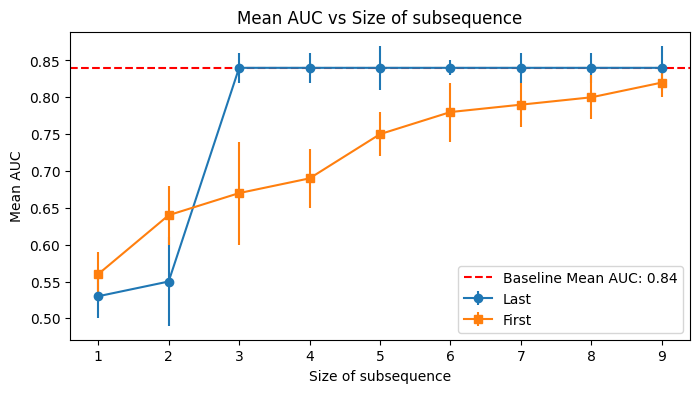

In [157]:
import matplotlib.pyplot as plt

baseline_mean_auc = 0.84

# Ensure all values are numeric
mean_aucs_last_sub = [float(x) for x in mean_aucs_last_sub]
mean_aucs_first_sub = [float(x) for x in mean_aucs_first_sub]
std_aucs_last_sub = [float(x) for x in std_aucs_last_sub]
std_aucs_first_sub = [float(x) for x in std_aucs_first_sub]

plt.figure(figsize=(8, 4))

# Plot mean AUCs with error bars
plt.errorbar(method_params, mean_aucs_last_sub, yerr=std_aucs_last_sub, fmt='-o', label="Last")
plt.errorbar(method_params, mean_aucs_first_sub, yerr=std_aucs_first_sub, fmt='-s', label="First")

# Plot the baseline mean AUC line
plt.axhline(y=baseline_mean_auc, color='r', linestyle='--', label=f"Baseline Mean AUC: {baseline_mean_auc:.2f}")

# Adding labels and title
plt.xlabel("Size of subsequence")
plt.ylabel("Mean AUC")
plt.title("Mean AUC vs Size of subsequence")
plt.legend()

# Display the plot
#plt.savefig("/Users/ajkunaseipi/Documents/MA4/PISA/plot/plot_report/mean_auc_vs_subsequence.png")
plt.show()


### Test

In [ ]:
# Function to compare results and find the closest match
def find_closest_match(baseline_results, method_results, metric="Mean AUC"):
    baseline_metric = float(baseline_results[0][metric])
    closest_n = None
    closest_diff = float('inf')
    optimal_diff = float(baseline_results[0]["Standard Deviation of AUC"])
    print("Optimal Diff: ", optimal_diff)
    
    for n, results in method_results.items():
        method_metric = float(results[0][metric])
        diff = abs(baseline_metric - method_metric)
        print("Diff: ", diff)
        if diff < optimal_diff:
            closest_n = n
            return closest_n, closest_diff
        else:
            if diff < closest_diff:
                closest_n = n
                closest_diff = diff
    
    return closest_n, closest_diff


def compare_results(args, method_mode):
    
    baseline_results = cross_validate(**args)
    print("Baseline Results:", baseline_results)

    # Store method results
    method_params = [2, 3, 4, 5, 6, 7, 8]
    method_results = {} 
    
    args_trunc = args.copy()
    args_trunc["sequence_method"] = "truncate"
    args_trunc["method_mode"] = method_mode
    args_trunc = {k: v for k, v in args_trunc.items() if k != "prediction"}
    
    for n in method_params:
        results = cross_validate_optimized(**args_trunc, method_param=n)
        method_results[n] = results
        
    # Find the closest match
    closest_n, closest_diff = find_closest_match(baseline_results, method_results)
    print(f"The parameter n that gives results closest to the baseline is {closest_n} with a difference of {closest_diff:.2f}")
    
    args_to_save = {k: v for k, v in args_trunc.items() if k != "data"}
    
    results = {"args": args_to_save, "baseline_results": baseline_results, "closest_n": closest_n, "n_results": method_results[closest_n], "closest_diff": closest_diff}
    
    return results


In [ ]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.03'}]
The parameter n that gives results closest to the baseline is 1 with a difference of 0.20


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'error',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'last'},
 'baseline_results': [{'Mean AUC': '0.84',
   'Standard Deviation of AUC': '0.02',
   'Mean Accuracy': '0.85',
   'Standard Deviation of Accuracy': '0.03'}],
 'closest_n': 1,
 'n_results': [{'Mean AUC': '0.64',
   'Standard Deviation of AUC': '0.05',
   'Mean Accuracy': '0.69',
   'Standard Deviation of Accuracy': '0.03'}],
 'closest_diff': 0.19999999999999996}

In [ ]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "case",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.86', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 1 with a difference of 0.24


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'case',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'last'},
 'baseline_results': [{'Mean AUC': '0.86',
   'Standard Deviation of AUC': '0.03',
   'Mean Accuracy': '0.85',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_n': 1,
 'n_results': [{'Mean AUC': '0.62',
   'Standard Deviation of AUC': '0.05',
   'Mean Accuracy': '0.70',
   'Standard Deviation of Accuracy': '0.03'}],
 'closest_diff': 0.24}

In [ ]:
args = {
    "model_type": "rf",
    "split_type": "distribution",
    "task": "case",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 1 with a difference of 0.21


{'args': {'model_type': 'rf',
  'split_type': 'distribution',
  'task': 'case',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'last'},
 'baseline_results': [{'Mean AUC': '0.83',
   'Standard Deviation of AUC': '0.02',
   'Mean Accuracy': '0.83',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_n': 1,
 'n_results': [{'Mean AUC': '0.62',
   'Standard Deviation of AUC': '0.06',
   'Mean Accuracy': '0.69',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_diff': 0.20999999999999996}

In [ ]:
args = {
    "model_type": "rf",
    "split_type": "distribution",
    "task": "error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "last")

Baseline Results: [{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 1 with a difference of 0.23


{'args': {'model_type': 'rf',
  'split_type': 'distribution',
  'task': 'error',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'last'},
 'baseline_results': [{'Mean AUC': '0.83',
   'Standard Deviation of AUC': '0.02',
   'Mean Accuracy': '0.82',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_n': 1,
 'n_results': [{'Mean AUC': '0.60',
   'Standard Deviation of AUC': '0.04',
   'Mean Accuracy': '0.69',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_diff': 0.22999999999999998}

In [ ]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "first")

Baseline Results: [{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.02'}]
The parameter n that gives results closest to the baseline is 1 with a difference of inf


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'error',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'first'},
 'baseline_results': [{'Mean AUC': '0.84',
   'Standard Deviation of AUC': '0.03',
   'Mean Accuracy': '0.84',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_n': 1,
 'n_results': [{'Mean AUC': '0.82',
   'Standard Deviation of AUC': '0.03',
   'Mean Accuracy': '0.85',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_diff': inf}

In [ ]:
args = {
    "model_type": "rf",
    "split_type": "median",
    "task": "error",
    "prediction": "success",
    "one_hot": False,
    "k": 5,
    "data": df
}

compare_results(args, "first")

Baseline Results: [{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.02'}]
Optimal Diff:  0.02
Diff:  0.04999999999999993
Diff:  0.09999999999999998
Diff:  0.13
Diff:  0.17999999999999994
Diff:  0.19999999999999996
Diff:  0.24
Diff:  0.26
The parameter n that gives results closest to the baseline is 2 with a difference of 0.05


{'args': {'model_type': 'rf',
  'split_type': 'median',
  'task': 'error',
  'one_hot': False,
  'k': 5,
  'sequence_method': 'truncate',
  'method_mode': 'first'},
 'baseline_results': [{'Mean AUC': '0.84',
   'Standard Deviation of AUC': '0.02',
   'Mean Accuracy': '0.85',
   'Standard Deviation of Accuracy': '0.02'}],
 'closest_n': 2,
 'n_results': [{'Mean AUC': '0.79',
   'Standard Deviation of AUC': '0.03',
   'Mean Accuracy': '0.78',
   'Standard Deviation of Accuracy': '0.03'}],
 'closest_diff': 0.04999999999999993}

### Let's analyse which features gives more weight to the prediction

In [ ]:
from train_optimal import *

args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model, X_train = cross_validate(**args)
results1

[{'Mean AUC': '0.85',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.85',
  'Standard Deviation of Accuracy': '0.02'}]

In [ ]:
feature_importances = model.feature_importances_
feature_importances

array([0.00000000e+00, 0.00000000e+00, 6.94985952e-05, 0.00000000e+00,
       0.00000000e+00, 2.68345640e-04, 2.55784641e-04, 0.00000000e+00,
       2.54513492e-04, 6.57023646e-04, 0.00000000e+00, 1.00228477e-03,
       1.18348264e-03, 2.67169866e-04, 1.66876105e-04, 3.67953561e-04,
       1.23504498e-06, 2.77084509e-04, 1.20595415e-03, 3.87535095e-04,
       1.47296341e-04, 2.15052965e-03, 1.32971529e-03, 1.64801159e-03,
       4.51673875e-04, 1.31749513e-03, 1.71367538e-03, 1.03482526e-03,
       1.06126891e-03, 4.13392389e-04, 1.11478349e-03, 1.32335549e-03,
       1.48435769e-03, 2.29780835e-03, 3.66200117e-03, 2.49237643e-03,
       3.95514504e-03, 5.23096938e-03, 2.69971363e-03, 2.72678984e-03,
       2.77752676e-03, 2.93722210e-03, 5.86946177e-03, 4.93084169e-03,
       5.90088029e-03, 6.15465604e-03, 5.05618304e-03, 4.63934053e-03,
       7.35305559e-03, 8.29969502e-03, 7.41919834e-03, 1.02683701e-02,
       7.82269609e-03, 9.58857309e-03, 1.23931309e-02, 1.11918894e-02,
      

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
results1

[{'Mean AUC': '0.87',
  'Standard Deviation of AUC': '0.03',
  'Mean Accuracy': '0.85',
  'Standard Deviation of Accuracy': '0.01'}]

In [ ]:
feature_importances = model.feature_importances_
feature_importances

array([0.00000000e+00, 0.00000000e+00, 2.39695853e-04, 0.00000000e+00,
       0.00000000e+00, 4.45164491e-04, 4.81906610e-05, 0.00000000e+00,
       9.56789340e-05, 2.34276048e-04, 0.00000000e+00, 1.19690155e-03,
       7.95555273e-04, 2.16076704e-04, 3.38289978e-04, 3.18086189e-04,
       1.39159202e-04, 3.27457021e-04, 1.55861825e-03, 4.04850325e-04,
       1.73087492e-04, 1.17153746e-03, 1.38706267e-03, 1.85352935e-03,
       2.47435989e-04, 8.33707093e-04, 1.40727414e-03, 9.10279477e-04,
       8.78878352e-04, 4.05812988e-04, 9.94188598e-04, 1.50214917e-03,
       1.30103875e-03, 2.46150246e-03, 3.98319496e-03, 3.35104829e-03,
       3.47241175e-03, 4.78979015e-03, 2.75426792e-03, 3.39421982e-03,
       4.10503301e-03, 3.69230616e-03, 5.69644848e-03, 6.44124698e-03,
       3.94518390e-03, 6.61854954e-03, 4.92422580e-03, 5.39448259e-03,
       8.07317064e-03, 7.33227742e-03, 6.70135581e-03, 9.00012381e-03,
       7.54294467e-03, 8.56433377e-03, 1.22091197e-02, 9.20395845e-03,
      

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.69', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.02'}]


array([0.00000000e+00, 0.00000000e+00, 3.95924559e-04, 0.00000000e+00,
       4.69712843e-04, 9.85976769e-04, 6.79084583e-04, 9.50244572e-05,
       5.51830586e-04, 5.54442184e-04, 3.94266071e-04, 1.37982014e-03,
       2.67160877e-03, 1.29017841e-03, 1.30951433e-03, 1.33294410e-03,
       9.55287606e-04, 7.87136153e-04, 3.25969684e-03, 5.56048321e-03,
       1.56388823e-03, 2.22134902e-03, 6.62003919e-03, 3.81033637e-03,
       6.28451992e-03, 6.95940846e-03, 6.00821784e-03, 6.35070224e-03,
       1.27708944e-02, 1.14516837e-02, 1.46618855e-02, 1.19016268e-02,
       2.08598465e-02, 1.68594370e-02, 2.14596663e-02, 2.08403855e-02,
       3.35557286e-02, 2.97494131e-02, 4.02468361e-02, 3.63458964e-02,
       5.07021927e-02, 5.08959864e-02, 6.42692425e-02, 6.14792019e-02,
       6.73250488e-02, 7.85193873e-02, 6.76937455e-02, 9.48532222e-02,
       7.18847668e-02, 5.91825132e-02])

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "error_world_code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.73', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.03'}]


array([0.        , 0.        , 0.        , 0.        , 0.00052574,
       0.00065596, 0.00018395, 0.00045144, 0.        , 0.00070588,
       0.00022882, 0.00020706, 0.00042873, 0.00026156, 0.00070991,
       0.00051674, 0.0003525 , 0.00077895, 0.00111635, 0.00069356,
       0.00043595, 0.00052517, 0.00050254, 0.00033554, 0.00041522,
       0.00052511, 0.00029257, 0.00066876, 0.00050621, 0.00057643,
       0.00139116, 0.00412126, 0.00086271, 0.00351615, 0.00179637,
       0.00151147, 0.00294136, 0.0046779 , 0.0029845 , 0.0048363 ,
       0.00309599, 0.00263771, 0.00255314, 0.00424117, 0.00396727,
       0.00679476, 0.00912299, 0.00781668, 0.00620199, 0.0084756 ,
       0.01034425, 0.00820451, 0.00974742, 0.0111995 , 0.01594063,
       0.01789116, 0.01448646, 0.01777768, 0.01956589, 0.02471987,
       0.02501462, 0.03500191, 0.03235731, 0.03353378, 0.04486755,
       0.0409559 , 0.05407254, 0.06834509, 0.05646508, 0.06316059,
       0.05963569, 0.05134477, 0.08243019, 0.05966594, 0.04712

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_error_code",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.76', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.77', 'Standard Deviation of Accuracy': '0.03'}]


array([0.00000000e+00, 0.00000000e+00, 4.33066174e-04, 0.00000000e+00,
       0.00000000e+00, 1.54921866e-04, 1.66087954e-04, 0.00000000e+00,
       0.00000000e+00, 5.03415233e-04, 0.00000000e+00, 8.75323710e-04,
       1.39545101e-03, 1.00200472e-04, 3.60534902e-04, 3.15166938e-04,
       6.11859975e-05, 2.74997263e-04, 1.96058777e-03, 1.17456282e-03,
       1.88322985e-04, 8.38295058e-04, 7.52190322e-04, 1.18886643e-03,
       6.42317032e-04, 1.08367104e-03, 1.62808534e-03, 1.32578175e-03,
       9.21399562e-04, 6.70101109e-04, 1.89586488e-03, 1.53478554e-03,
       2.01866903e-03, 3.47035446e-03, 5.56268638e-03, 2.26566657e-03,
       3.95910653e-03, 4.90740115e-03, 2.34624518e-03, 2.86736709e-03,
       2.87836386e-03, 1.72771857e-03, 7.24490652e-03, 5.25860943e-03,
       5.95766706e-03, 8.53309505e-03, 7.03747241e-03, 6.94749323e-03,
       1.17290445e-02, 1.03119290e-02, 9.20352471e-03, 1.62383648e-02,
       1.23694344e-02, 1.11000652e-02, 1.69084669e-02, 1.61619980e-02,
      

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.02'}]


array([0.00000000e+00, 0.00000000e+00, 6.94985952e-05, 0.00000000e+00,
       0.00000000e+00, 2.68345640e-04, 2.55784641e-04, 0.00000000e+00,
       2.54513492e-04, 6.57023646e-04, 0.00000000e+00, 1.00228477e-03,
       1.18348264e-03, 2.67169866e-04, 1.66876105e-04, 3.67953561e-04,
       1.23504498e-06, 2.77084509e-04, 1.20595415e-03, 3.87535095e-04,
       1.47296341e-04, 2.15052965e-03, 1.32971529e-03, 1.64801159e-03,
       4.51673875e-04, 1.31749513e-03, 1.71367538e-03, 1.03482526e-03,
       1.06126891e-03, 4.13392389e-04, 1.11478349e-03, 1.32335549e-03,
       1.48435769e-03, 2.29780835e-03, 3.66200117e-03, 2.49237643e-03,
       3.95514504e-03, 5.23096938e-03, 2.69971363e-03, 2.72678984e-03,
       2.77752676e-03, 2.93722210e-03, 5.86946177e-03, 4.93084169e-03,
       5.90088029e-03, 6.15465604e-03, 5.05618304e-03, 4.63934053e-03,
       7.35305559e-03, 8.29969502e-03, 7.41919834e-03, 1.02683701e-02,
       7.82269609e-03, 9.58857309e-03, 1.23931309e-02, 1.11918894e-02,
      

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "world_code_error_case",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.86', 'Standard Deviation of Accuracy': '0.03'}]


array([0.00000000e+00, 0.00000000e+00, 2.03692490e-04, 0.00000000e+00,
       0.00000000e+00, 1.41531412e-05, 0.00000000e+00, 0.00000000e+00,
       1.40194775e-04, 0.00000000e+00, 1.74506775e-04, 5.54699590e-04,
       6.23093883e-04, 0.00000000e+00, 7.95687127e-04, 1.05702414e-03,
       0.00000000e+00, 2.68899227e-04, 1.08377425e-04, 1.25320730e-04,
       3.58337815e-04, 1.89081181e-04, 6.22259536e-05, 0.00000000e+00,
       1.39098601e-03, 5.97178424e-04, 0.00000000e+00, 9.36644548e-07,
       1.60857157e-03, 1.15036360e-03, 4.32036465e-04, 4.75502500e-04,
       8.62444301e-04, 8.99876091e-04, 4.37358559e-04, 6.30706256e-04,
       7.69211706e-04, 5.78329014e-04, 2.79214823e-03, 7.94266440e-04,
       9.87119719e-04, 8.64021194e-04, 1.56163994e-03, 4.50464258e-03,
       1.50601905e-03, 1.49784452e-03, 2.03251738e-03, 1.80853995e-03,
       2.35536294e-03, 1.63040958e-03, 1.55491148e-03, 1.82705530e-03,
       3.15645021e-03, 2.42201183e-03, 2.66802493e-03, 1.60359995e-03,
      

In [ ]:
args = {
            "model_type": "rf",
            "split_type": "median",
            "task": "code_world_error",
            "prediction": "success",
            "one_hot": False,
            "k": 5,
            "data": df
        }

results1, model = cross_validate(**args)
print(results1)

feature_importances = model.feature_importances_
feature_importances

[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.85', 'Standard Deviation of Accuracy': '0.02'}]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.93464852e-04, 0.00000000e+00,
       5.93783973e-05, 2.19696973e-04, 0.00000000e+00, 2.63207813e-04,
       1.33345154e-04, 2.22528737e-04, 2.38933334e-04, 1.47094184e-04,
       0.00000000e+00, 2.97599574e-04, 9.84538128e-04, 1.80722434e-04,
       2.91127013e-04, 1.53414829e-03, 8.80775290e-04, 6.32118300e-04,
       1.52383220e-03, 4.77688764e-04, 5.84349437e-04, 8.59984846e-04,
       4.30617285e-04, 6.35483228e-04, 3.16769943e-03, 9.51377717e-04,
       5.12914263e-04, 2.67637299e-03, 1.57451477e-03, 3.08358395e-03,
       5.84287811e-03, 3.78966805e-03, 1.93353429e-03, 2.80970540e-03,
       3.28102785e-03, 2.25166803e-03, 6.92480650e-03, 5.27985369e-03,
       3.39274702e-03, 5.05421557e-03, 3.73096725e-03, 5.42769506e-03,
       1.07889168e-02, 8.56771843e-03, 7.13820475e-03, 9.11460014e-03,
       6.31162127e-03, 6.96080956e-03, 1.48792859e-02, 9.74101780e-03,
      